In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


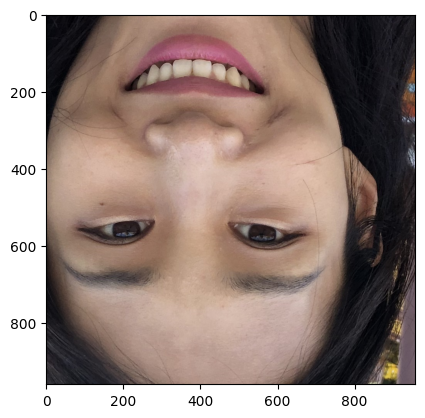

In [ ]:
import dlib
from skimage import io
import matplotlib.pyplot as plt

detector = dlib.get_frontal_face_detector()
image = io.imread('/content/drive/MyDrive/얼굴마비/joy_image/d01097b8d1b0ed0f08ad6fc81ad2d1f6b562df02a21b017264c28eb59f7f342d_┐⌐_20_▒Γ╗▌_┐└╢⌠&░°┐¼╜├╝│_20201207151357-005-002.jpeg')
faces = detector(image, 1)

for i, d in enumerate(faces):
    # 얼굴을 크롭합니다.
    crop_img = image[d.top():d.bottom(), d.left():d.right()]
    # io.imsave(f'crop_face_{i}.jpg', crop_img)

plt.imshow(crop_img)
plt.axis('off')
plt.show()

In [ ]:
#전처리


import dlib
from skimage import io, transform
import os

# 얼굴 감지기 로드
detector = dlib.get_frontal_face_detector()

# 원본 이미지 폴더와 결과를 저장할 폴더 경로 설정
input_folder = '/content/drive/MyDrive/얼굴마비/angry_image'  # 원본 이미지가 들어있는 폴더 경로
output_folder = '/content/drive/MyDrive/얼굴마비/prepro_angry_image'  # 크롭된 이미지를 저장할 폴더 경로
os.makedirs(output_folder, exist_ok=True)

# 크롭 범위를 늘리기 위한 padding 설정
padding = 250 # 얼굴 주위에 20픽셀 추가
saved_image_count = 0

# 입력 폴더의 모든 파일 처리
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        # 이미지 로드
        image_path = os.path.join(input_folder, filename)
        image = io.imread(image_path)

        # 얼굴 감지
        faces = detector(image, 1)

        # 각 얼굴에 대해 크롭, 리사이즈 및 저장
        for i, d in enumerate(faces):
            # 크롭 범위 설정 (padding을 적용)
            top = max(d.top() - padding, 0)
            bottom = min(d.bottom() + padding, image.shape[0])
            left = max(d.left() - padding, 0)
            right = min(d.right() + padding, image.shape[1])

            # 크롭 및 리사이즈
            crop_img = image[top:bottom, left:right]
            resized_img = transform.resize(crop_img, (128, 128))

            # 저장 경로 설정
            base_filename = os.path.splitext(filename)[0]
            output_path = os.path.join(output_folder, f'{base_filename}_face_{i}.jpg')

            # 이미지 저장
            io.imsave(output_path, (resized_img * 255).astype('uint8'))

            # 결과 이미지를 확인하기 위해 바로 보여줍니다.
            # io.imshow(resized_img)
            # io.show()
            saved_image_count += 1

            # 100장 단위로 메시지 출력
            if saved_image_count % 100 == 0:
                print(f'{saved_image_count} images saved.')

print(f'Total {saved_image_count} images saved.')



100 images saved.
200 images saved.
300 images saved.
400 images saved.
500 images saved.
600 images saved.
700 images saved.
800 images saved.
900 images saved.
1000 images saved.
1100 images saved.
1200 images saved.
1300 images saved.
1400 images saved.
1500 images saved.
1600 images saved.
1700 images saved.
1800 images saved.
1900 images saved.
2000 images saved.
2100 images saved.
2200 images saved.
2300 images saved.
2400 images saved.
2500 images saved.
2600 images saved.
2700 images saved.
2800 images saved.
2900 images saved.
3000 images saved.
3100 images saved.
3200 images saved.
3300 images saved.
3400 images saved.
3500 images saved.
3600 images saved.
3700 images saved.
3800 images saved.
3900 images saved.
4000 images saved.
4100 images saved.
4200 images saved.
4300 images saved.
4400 images saved.
4500 images saved.
4600 images saved.
4700 images saved.
4800 images saved.
4900 images saved.
5000 images saved.
5100 images saved.
5200 images saved.
5300 images saved.
54

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


OSError: broken data stream when reading image file

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/얼굴마비/facial-expression/train.csv')
data.info()

#(0=Angry,  3=joy, 4=Sad, 5=Surprise,).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  28709 non-null  int64 
 1   pixels   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0
